## Few example images and their label

In [1]:
# All imports
import os
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import matplotlib.patches as patches
from matplotlib.colors import XKCD_COLORS
import cv2

## Data Visualization SVHN

In [2]:
root_path_svhn = '/home/pranic_sivadas/SVHN/'
train = loadmat(os.path.join(root_path_svhn,'train_32x32.mat'))
test = loadmat(os.path.join(root_path_svhn,'test_32x32.mat'))

In [3]:
train_image_data = train['X'].transpose((3,0,1,2))
train_labels = train['y']

#Replace all the labels “10“ with label “0”.
train_labels[train_labels==10] = 0

In [4]:
def plot_images(image_data,labels):
    fig,axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=(10,10))
    indices = random.sample(range(0,len(labels)),9)
    for i,idx in enumerate(indices):
        i_row = int(float(i) / 3)
        i_col = i - i_row * 3
        axs[i_row][i_col].imshow(image_data[idx])
        axs[i_row][i_col].set_xlabel(f' Label:{labels[idx]}')

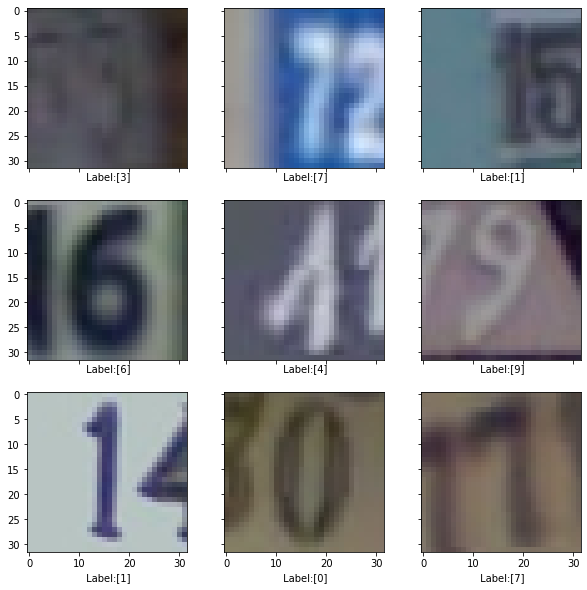

In [5]:
plot_images(train_image_data,train_labels)

## Data Visualization COCO

In [6]:
root_path_coco = '/home/pranic_sivadas/COCO/'
val_images_path = os.path.join(root_path_coco,'val2017')

In [7]:
val_images = []
for root, dirs, files in os.walk(val_images_path):
    for file in files:
        val_images.append(os.path.join(root,file))

Text(0.5, 1.0, 'Image name : 000000391375.jpg')

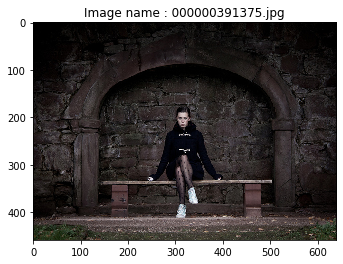

In [8]:
img_name = val_images[3]
img = plt.imread(img_name)
plt.imshow(img)
plt.title(f'Image name : {os.path.basename(img_name)}')

In [9]:
with open(os.path.join(root_path_coco,'annotations/person_keypoints_val2017.json'),'r') as json_file:
    data = json.load(json_file)

In [10]:
img_data = [item for item in data['images'] if item['file_name'] == os.path.basename(img_name)]
img_id = img_data[0]['id']
img_annotations = [item for item in data['annotations'] if item['image_id'] == img_id]

In [11]:
x,y,width,height = img_annotations[0]['bbox']
keypoints_data = img_annotations[0]['keypoints']

In [12]:
# getting only relevant keypoints if v == 2
n = 3
key_pts_names = data['categories'][0]['keypoints']
chunked_key_pts = {name:keypoints_data[i:i + 2] for i,name in zip(range(0, len(keypoints_data), n),key_pts_names) 
                   if keypoints_data[i+2] == 2}
keypts_clrs_mapping = dict(zip(chunked_key_pts,XKCD_COLORS.keys()))

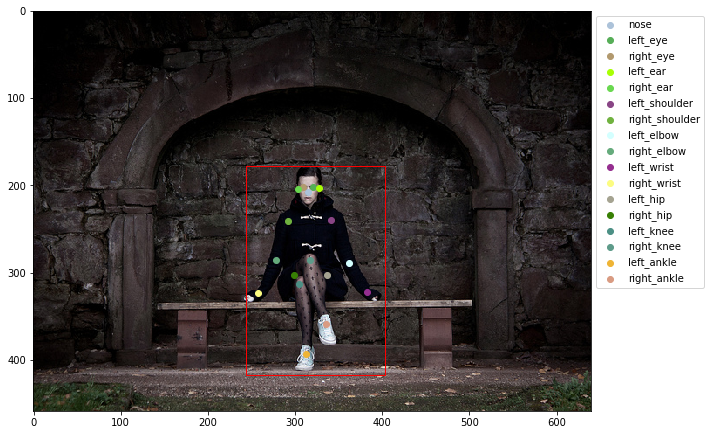

In [13]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(img)
rect = patches.Rectangle(
                    (x, y),
                    width,
                    height,
                    linewidth=1,
                    edgecolor="r",
                    facecolor="none",)
ax.add_patch(rect)

for key,(x_coord,y_coord) in chunked_key_pts.items():
    ax.scatter(x_coord,y_coord,color=keypts_clrs_mapping[key],label=key )
    ax.legend(loc="upper left", bbox_to_anchor=(1.0,1.0))
    

## Crop the image inside the bounding box and then resize the cropped image to a size of 256x192 pixels

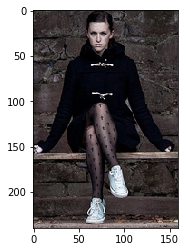

In [14]:
cropped_img = img[int(y):int(y+height),int(x):int(x+width),:]
plt.imshow(cropped_img)

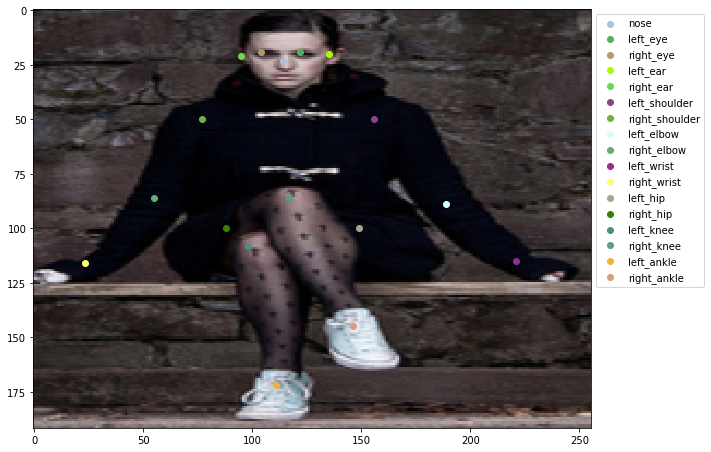

In [15]:
h,w,c = cropped_img.shape
resized_image = cv2.resize(cropped_img,(256,192))
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.imshow(resized_image)

for key,(x_coord,y_coord) in chunked_key_pts.items():
    x_coord_scaled = int((x_coord-x) * 256 / w)
    y_coord_scaled = int((y_coord-y) * 192 / h)
  
    ax.scatter(x_coord_scaled,y_coord_scaled,color=keypts_clrs_mapping[key],label=key )
    ax.legend(loc="upper left", bbox_to_anchor=(1.0,1.0))